### Student Information
Name: 楊碩桓

Student ID: M1244021 

GitHub ID: Sohuan

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

---

### Exercises in  DM2024-Lab1-Master

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [ ]:
#Answer here
sci_med_subject_df = X[(X['category_name'] == 'sci.med') & (X['text'].str.contains('Subject'))]
print(sci_med_subject_df)

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
# Answer here

#In the dictionary list NA_dict, strings like 'NaN' and 'None'(id C and D) are used to represent missing values. These strings will be treated as ordinary strings instead of NaN values ​​in pandas.

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
# Answer here
# X_sample only contains 1000 randomly sampled rows of data from X, not the entire data.
# Due to random sampling, the order of data rows in X_sample may be different from that in X

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [ ]:
# Answer here

X_counts = X.category_name.value_counts()
X_sample_counts = X_sample.category_name.value_counts()

df_counts = pd.DataFrame({'X': X_counts, 'X_sample': X_sample_counts}).fillna(0)

df_counts = df_counts.loc[X_counts.index]

df_counts.plot(kind='bar', 
               figsize=(10, 5), 
               width=0.3,
               color=['steelblue', 'darkorange'])
plt.title('Category Distribution')
plt.ylim([0, max(df_counts.max()) * 1.1])  # 動態設置 y 軸範圍
plt.xticks(rotation=0)
plt.legend(['X', 'X_sample'], loc='upper right')
plt.tight_layout()
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
# Answer here

record = X_counts[4].toarray().flatten()  # 獲取第五筆記錄並轉換為密集數組

one_indices = np.where(record == 1)[0]

second_one_index = one_indices[1]

count_vect.get_feature_names_out()[second_one_index]

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [ ]:
# Answer here

doc_frequencies = X_counts.sum(axis=1).A1   
term_frequencies = X_counts.sum(axis=0).A1  
min_doc_frequency = 5 
min_term_frequency = 5 

X_filtered = X_counts[(doc_frequencies >= min_doc_frequency), :]
X_filtered = X_filtered[:, (term_frequencies >= min_term_frequency)]
plot_z = X_filtered[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",fmt="d",
                 vmin=0, vmax=1, annot=True)


### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# Answer here
import plotly.graph_objects as go
import plotly.offline as pyo

terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

fig = go.Figure(data=[
    go.Bar(
        x=terms,
        y=frequencies,
        text=frequencies,
        textposition='auto'
    )
])

fig.update_layout(
    title="Term Frequencies of Top 300 Terms",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
    xaxis_tickangle=-90, 
    width=1500, 
    height=500         
)
pyo.init_notebook_mode()  
pyo.iplot(fig)  

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [ ]:
# Answer here

top_n = 100
threshold = np.sort(term_frequencies)[-top_n]

high_freq_terms = count_vect.get_feature_names_out()[term_frequencies >= threshold]
high_freq_frequencies = term_frequencies[term_frequencies >= threshold]

fig, ax = plt.subplots(figsize=(20, 10))
g = sns.barplot(x=high_freq_terms, y=high_freq_frequencies, ax=ax)

g.set_xticklabels(high_freq_terms, rotation=90)

g.set_title('Top 100 High-Frequency Terms')
g.set_xlabel('Terms')
g.set_ylabel('Frequencies')
plt.tight_layout()
plt.show()

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [ ]:
# Answer here
terms = count_vect.get_feature_names_out()
frequencies = term_frequencies

term_freq_dict = dict(zip(terms, frequencies))
sorted_terms = sorted(term_freq_dict.items(), key=lambda item: item[1], reverse=True)

top_n = 100 
top_terms, top_frequencies = zip(*sorted_terms[:top_n])

plt.figure(figsize=(20, 10)) 
g = sns.barplot(x=top_terms, y=top_frequencies)
g.set_xticklabels(top_terms, rotation=90)
g.set_title(f'Top {top_n} Term Frequencies')
g.set_xlabel('Terms')
g.set_ylabel('Frequencies')
plt.tight_layout()
plt.show()


### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [ ]:
# Answer here
# The frequency graph shows that there are a few extremely high-frequency words in the text, and these words stand out significantly on the graph; while the term_frequencies_log graph shows that more words have higher frequencies and are more evenly distributed. In terms of visual effects, the graph of term_frequencies_log makes it easier for observers to understand the overall occurrence of words in the text, while the graph of frequencies highlights the high-frequency characteristics of a few words.

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [ ]:
# Answer here
# similarity
# Negativity and negative emotions: Many filtered words have negative or negative connotations, such as "disqualified", "disproving", "disgust", "disguised", etc. These words imply something related to doubt, questioning or dissatisfaction emotions. In the category of "alt.atheism", such words may represent questioning and criticism of certain beliefs or concepts.
# Personal-level vocabulary: Some words, such as "personality", "personalities", "personify", and "persuade", show the interpersonal interaction or influence of opinions in discussions in this category. These words may point to people in the "alt.atheism" category trying to influence others or express personal opinions.

# difference
# Political and Social Vocabulary: Words such as "dissidents", "disenfranchisement", "pillage" and "plundered" may be more suitable for political or social justice topics, expressing feelings of resistance or social injustice, which are found in "alt.atheism" may represent atheists’ dissatisfaction with power or institutions.
# Scientific and philosophical concepts: Words such as "discrepancy," "discrete," and "diverge" are often used to describe differences and disagreements in opinions or beliefs, consistent with the arguments that atheists might challenge or analyze religious beliefs.

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [ ]:
# Answer Here

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj5 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj5.mine()
frequentPatternsDF_comp_graphics= obj5.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj5.getRuntime())) #measure the runtime

obj5.save('freq_patterns_comp_graphics_minSup6.txt') #save the patterns
frequentPatternsDF_comp_graphics

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj5 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj5.mine()
frequentPatternsDF_comp_graphics= obj5.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj5.getRuntime())) #measure the runtime

obj5.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj5 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj5.mine()
frequentPatternsDF_comp_graphics= obj5.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj5.getRuntime())) #measure the runtime

obj5.save('freq_patterns_comp_graphics_minSup3.txt') #save the patterns
frequentPatternsDF_comp_graphics

# Answer Here
# Reducing minSup will result in a large increase in the number of patterns, which means that the diversity of the data set will be higher, but may introduce many redundant or unimportant patterns.
# The running time increases with the number of patterns, especially with minSup=3.
# When analyzing the results, the practical application scenarios of the patterns should be considered to determine whether more patterns are needed or to focus on fewer but more representative patterns.

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [ ]:
# Answer here
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})  # 3D subplots
fig.suptitle('PCA, t-SNE, and UMAP Comparison in 3D')

def plot_3d_scatter(ax, X_reduced, title, camera_angles):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category][:, 0]
        ys = X_reduced[X['category_name'] == category][:, 1]
        zs = X_reduced[X['category_name'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

    for angle in camera_angles:
        ax.view_init(*angle)

camera_angles = [(30, 30), (60, 30), (90, 30)]

plot_3d_scatter(axes[0], X_pca_aug, 'PCA', camera_angles)
plot_3d_scatter(axes[1], X_tsne_aug, 't-SNE', camera_angles)
plot_3d_scatter(axes[2], X_umap_aug, 'UMAP', camera_angles)

plt.show()


### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here
mlb.fit(X.category_name)
X['bin_category1'] = mlb.transform(X['category_name']).tolist()
X[0:9]
# It also work 

### HW

---

In [4]:
### Begin Assignment Here
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

c:\Users\Jason\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
import pandas as pd

# Convert the 'Dataset' object to a pandas DataFrame
df_train = pd.DataFrame(ds['train'])

# Access the 'comment' column
comments = df_train['comment']
sentiments = df_train['sentiment']

# Print the first few rows of the DataFrame
print(df_train.head())

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


In [40]:
missing_values = df_train.isnull().sum()
print("null_count:\n", missing_values)

null_count:
 sentiment    0
comment      0
dtype: int64


In [41]:
df_train = df_train.drop_duplicates()

In [67]:
sampled_data = df_train.sample(n=1000, random_state=42)
print(sampled_data)

          sentiment                                            comment
1117      nostalgia                 Feeling nostalgic. My school time.
1396      nostalgia  Oh, cool man I miss the 1980s, but don't the o...
423   not nostalgia  That describes old age, the so-called "golden"...
414       nostalgia  Omg he reminds me so much of my father, he lov...
452   not nostalgia  Proper pop record, big intro, catchy tune, lov...
...             ...                                                ...
367       nostalgia  This song has beautiful memories taking me bac...
506   not nostalgia  Is there a place called mockingbird hill it wo...
851       nostalgia  I remember the words to this song like it was ...
1315      nostalgia  Great song brings back memories from when I wa...
384       nostalgia  I danced to this exact record in 1969.  Good m...

[1000 rows x 2 columns]


C:\Users\Jason\AppData\Local\Temp\ipykernel_8404\1119613102.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Count', data=data_counts, palette='Set2')


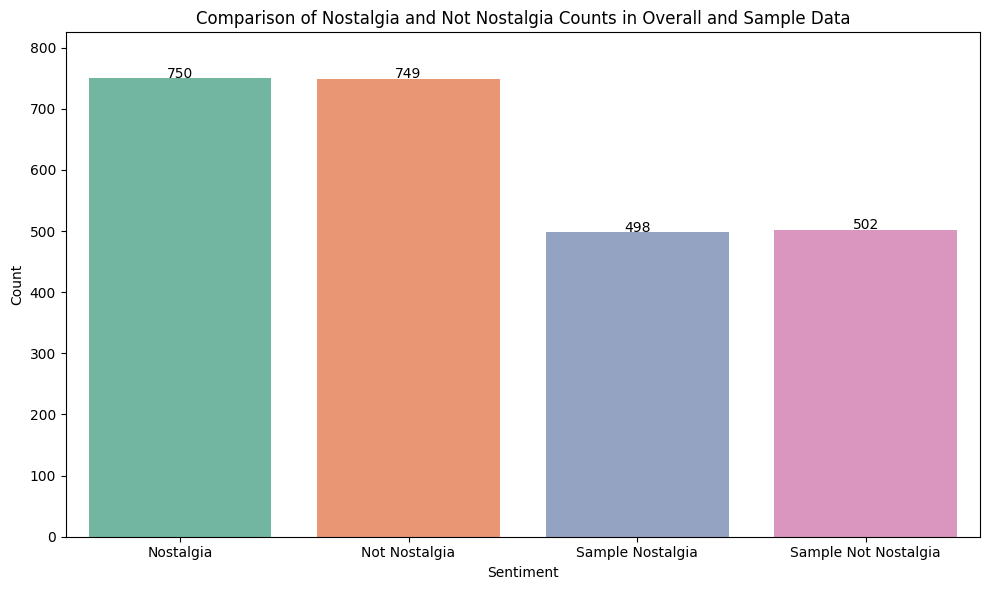

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the counts of "nostalgia" and "not nostalgia" in the overall sentiment
overall_nostalgia_count = (df_train['sentiment'] == 'nostalgia').sum()
overall_not_nostalgia_count = (df_train['sentiment'] == 'not nostalgia').sum()

# Calculate the counts of "nostalgia" and "not nostalgia" in the sample sentiment
sample_nostalgia_count = (sampled_data['sentiment'] == 'nostalgia').sum()
sample_not_nostalgia_count = (sampled_data['sentiment'] == 'not nostalgia').sum()

# Create a DataFrame for plotting
data_counts = pd.DataFrame({
    'Sentiment': ['Nostalgia', 'Not Nostalgia', 'Sample Nostalgia', 'Sample Not Nostalgia'],
    'Count': [
        overall_nostalgia_count,
        overall_not_nostalgia_count,
        sample_nostalgia_count,
        sample_not_nostalgia_count
    ]
})

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Count', data=data_counts, palette='Set2')

# Set title and y-axis limits
plt.title('Comparison of Nostalgia and Not Nostalgia Counts in Overall and Sample Data')
plt.ylim([0, max(data_counts['Count']) * 1.1])  # Dynamically set y-axis range
plt.ylabel('Count')
plt.xlabel('Sentiment')

# Add count text on top of each bar
for index, value in enumerate(data_counts['Count']):
    plt.text(index, value + 1, str(value), ha='center')

plt.tight_layout()
plt.show()


In [71]:
import nltk
from nltk.tokenize import word_tokenize

df_train['comment_tokens'] = df_train['comment'].apply(lambda x: word_tokenize(str(x)))

# Check word segmentation results
print(df_train[['comment', 'comment_tokens']].head())


                                             comment  \
0  He was a singer with a golden voice that I lov...   
1  The mist beautiful voice ever I listened to hi...   
2  I have most of Mr. Reeves songs.  Always love ...   
3  30 day leave from 1st tour in Viet Nam to conv...   
4  listening to his songs reminds me of my mum wh...   

                                      comment_tokens  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...  
4  [listening, to, his, songs, reminds, me, of, m...  


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TfidfVectorizer to convert text
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
X_tfidf = tfidf_vectorizer.fit_transform(df_train['comment'].astype(str))

# View TF-IDF features
print(tfidf_vectorizer.get_feature_names_out())


['10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '19' '1960' '1963'
 '1966' '1970' '1973' '1980' '1988' '1st' '20' '2018' '2019' '30' '40'
 '47' '50' '50s' '60' '60s' '70' '70s' '80' '80s' '90' '90s' 'able'
 'about' 'absolutely' 'actually' 'after' 'again' 'age' 'ago' 'agree'
 'album' 'alive' 'all' 'almost' 'along' 'already' 'also' 'although'
 'always' 'am' 'amazing' 'an' 'and' 'angel' 'another' 'any' 'anybody'
 'anymore' 'anyone' 'anything' 'appreciate' 'are' 'around' 'artist'
 'artists' 'as' 'ask' 'at' 'attention' 'away' 'awesome' 'baby' 'back'
 'background' 'bad' 'band' 'bass' 'be' 'beach' 'beat' 'beatles'
 'beautiful' 'beautifully' 'beauty' 'because' 'been' 'before' 'behind'
 'being' 'believe' 'best' 'better' 'big' 'billy' 'bit' 'black' 'bless'
 'born' 'both' 'bought' 'boy' 'boyfriend' 'break' 'brenda' 'brilliant'
 'bring' 'bringing' 'brings' 'broke' 'broken' 'brother' 'brothers'
 'brought' 'but' 'by' 'called' 'came' 'can' 'cant' 'car' 'care'
 'carpenters' 'cassette' 'cause' 'cer

In [100]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assume that df_train has read and contains the 'comment' field
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Split the comment into a list of terms and remove stop words
comments_tokens = df_train['comment'].astype(str).apply(lambda x: [word for word in nltk.word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_train['sentiment'], test_size=0.2, random_state=42)

#Train model
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Prediction and evaluation
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

    nostalgia       0.93      0.88      0.90       158
not nostalgia       0.87      0.92      0.90       142

     accuracy                           0.90       300
    macro avg       0.90      0.90      0.90       300
 weighted avg       0.90      0.90      0.90       300



In [84]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_tfidf)

# View keywords for each topic
terms = tfidf_vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    terms_indices = topic.argsort()[-10:]
    top_terms = [terms[idx] for idx in terms_indices]
    print(f"Topic {i}: {', '.join(top_terms)}")


Topic 0: is, one, music, it, in, great, this, and, of, the
Topic 1: my, to, me, love, brings, you, back, song, this, memories
Topic 2: when, in, it, and, song, this, to, my, was, the
Topic 3: found, makes, pleasure, sound, read, gorgeous, beautiful, classic, truly, nostalgic
Topic 4: music, in, of, back, this, me, days, my, to, the


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('D:/py/DM2024-Lab1-Homework/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

# Generate TF-IDF features
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
X_tfidf = tfidf_vectorizer.fit_transform(df['comment'].astype(str))
y = df['sentiment']

# Convert TF-IDF features to DataFrame for viewing
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

# Build a Naive Bayes Classifier

# Build a classifier using TF-IDF features
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("TF-IDF Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

# Build a classifier using word frequency features
count_vectorizer = CountVectorizer(min_df=5, max_df=0.8)
X_count = count_vectorizer.fit_transform(df['comment'].astype(str))

X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)

nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
y_pred_count = nb_count.predict(X_test_count)

print("Word Frequency Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print(classification_report(y_test, y_pred_count))

# Compare classifier results
print("Comparison of Classifiers:")
print(f"TF-IDF Classifier Accuracy: {accuracy_score(y_test, y_pred_tfidf):.4f}")
print(f"Word Frequency Classifier Accuracy: {accuracy_score(y_test, y_pred_count):.4f}")


    10  100   11   12   13   14   15   16        17   18  ...     years  yes  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.000000  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.000000  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.170847  0.0  ...  0.000000  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.101939  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.000000  0.0   

   yesterday  yet       you  young  younger  your  youth  youtube  
0        0.0  0.0  0.190405    0.0      0.0   0.0    0.0      0.0  
1        0.0  0.0  0.000000    0.0      0.0   0.0    0.0      0.0  
2        0.0  0.0  0.000000    0.0      0.0   0.0    0.0      0.0  
3        0.0  0.0  0.089248    0.0      0.0   0.0    0.0      0.0  
4        0.0  0.0  0.000000    0.0      0.0   0.0    0.0      0.0  

[5 rows x 760 columns]
TF-IDF Classifier Results:
Accuracy: 0.87
               precision    recall  f1-score 

In [6]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
comments = ds['train']['comment']
sentiments = ds['train']['sentiment']

# Create TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(comments)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, sentiments, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier using TF-IDF features
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train, y_train)

# Predict the sentiment of test data using TF-IDF features
y_pred_tfidf = nb_tfidf.predict(X_test)

# Calculate accuracy of the TF-IDF classifier
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

# Create a simple Naive Bayes classifier using word frequency features
X_freq = vectorizer.transform(comments)
nb_freq = MultinomialNB()
nb_freq.fit(X_freq, sentiments)

# Predict the sentiment of test data using word frequency features
y_pred_freq = nb_freq.predict(X_test)

# Calculate accuracy of the word frequency classifier
accuracy_freq = accuracy_score(y_test, y_pred_freq)

# Print the accuracies
print("Accuracy using TF-IDF features:", accuracy_tfidf)
print("Accuracy using word frequency features:", accuracy_freq)

Accuracy using TF-IDF features: 0.8333333333333334
Accuracy using word frequency features: 0.96


### Data Preprocessing Improvement Suggestions

In the process of preprocessing the new dataset, I identified several inefficient and suboptimal practices:

1. **Handling Missing Values**: The current method of deleting rows with missing values is too simplistic and can lead to significant data loss. Instead, I suggest using imputation methods such as filling in with the mean or median, or applying predictive modeling techniques to estimate missing values.

2. **Text Cleaning**: The existing text cleaning approach may result in the loss of important domain-specific terms. A more sophisticated cleaning process that incorporates a vocabulary of commonly used terms and synonyms would be beneficial to retain relevant information.

3. **Feature Selection**: The feature extraction phase did not adequately filter the vocabulary, which resulted in many irrelevant features being included. I recommend employing feature selection techniques, such as L1 regularization, before feature extraction to reduce dimensionality and enhance model performance.

4. **Data Imbalance**: There may be an imbalance in class distribution within our dataset, leading to biased model predictions. I propose using oversampling (e.g., SMOTE) or undersampling strategies to balance the dataset and improve the model's generalization capability.

5. **Model Evaluation**: The current evaluation strategy relies solely on accuracy, which may not provide a comprehensive assessment of model performance. I recommend integrating multiple evaluation metrics, including confusion matrices, F1-scores, and AUC, for a more thorough evaluation of the model.

By implementing these improvements, we can handle the dataset more effectively and enhance the performance of the final model.
